In [ ]:
# %pip install tensorflow-probability==0.15.0

In [1]:
# magic command for automatic reload of python modules without needing to restart the notebook
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import scipy as sc
import tensorflow as tf
import tensorflow_probability as tfp
tfd=tfp.distributions
tfb=tfp.bijectors
from scipy import io
import time
import matplotlib.pyplot as plt
from sklearn import mixture
import joblib as jbl
import sys
import sklearn
import pandas as pd
from mixture_models import GMCM, GMC
import utils_v1 as utl

In [7]:
# # checking the device specification
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

Number of samples = 150, Number of dimensions = 4
Learning Marginals
Marginals learnt in 1.98 s.
@ Iter:0,                         Training error: 0.3,                         Validation error: nan,                         Time Elapsed: 6.3 s
@ Iter:500,                         Training error: -2.3,                         Validation error: nan,                         Time Elapsed: 11.2 s
@ Iter:1000,                         Training error: -2.5,                         Validation error: nan,                         Time Elapsed: 16.5 s
@ Iter:1500,                         Training error: -2.5,                         Validation error: nan,                         Time Elapsed: 21.9 s


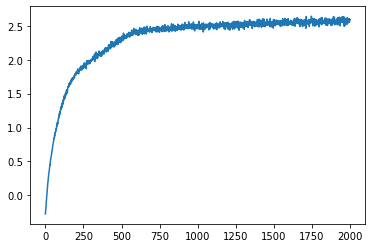

In [16]:
# Example learning GMMC on Iris dataset
from sklearn.datasets import load_iris

data=load_iris().data.astype('float32')
nsamps,ndims = data.shape


# Defining a preprocessing bijective transform (eg, log transform in this case)  
min_val = (np.min(data)-3*np.std(data)).astype('float32')
log_transform = tfb.Chain([tfb.Shift(shift=min_val),tfb.Exp()])


data_trn,data_vld,data_tst = utl.splitData(data)

# data_in = data.astype('float32')
nsamps,ndims = data.shape
print(f'Number of samples = {nsamps}, Number of dimensions = {ndims}')

# Initialing GMCM object
gmcm_obj=GMCM(ndims, data_transform=log_transform)
# Train GMCM
nll_train,_,_=gmcm_obj.fit_dist_IFM(data_trn,
                                    n_comps=3,
                                    batch_size=100,
                                    max_iters=2000,
                                    print_interval=500)

# plots log-likelihood
plt.plot(-nll_train)

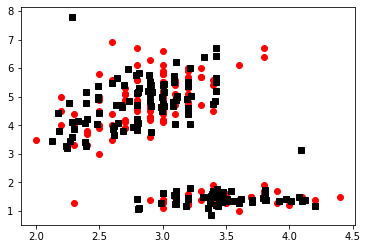

In [19]:
sampled=gmcm_obj.distribution.sample(150)
plt.plot(data[:,1],data[:,2],'ro')
plt.plot(sampled[:,1],sampled[:,2],'ks')